In [1]:
# =========================================================
# 📊 EDA complète : Home Credit Default Risk
# =========================================================

# 1️⃣ Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid", palette="Set2")

# =========================================================
# 2️⃣ Chargement du dataset
# =========================================================
df = pd.read_csv("application_train.csv")

print("✅ Dimensions du dataset :", df.shape)
df.head()


✅ Dimensions du dataset : (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [2]:
# =========================================================
# 3️⃣ Aperçu global des données
# =========================================================
print("🧩 Aperçu des types de données :")
print(df.info())

print("\n📈 Statistiques descriptives :")
display(df.describe())

print("\n💡 Colonnes avec valeurs manquantes :")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
pd.DataFrame({"missing_values": missing, "percent": missing_percent}).head(15)


🧩 Aperçu des types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

📈 Statistiques descriptives :


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192


💡 Colonnes avec valeurs manquantes :


,missing_values,percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


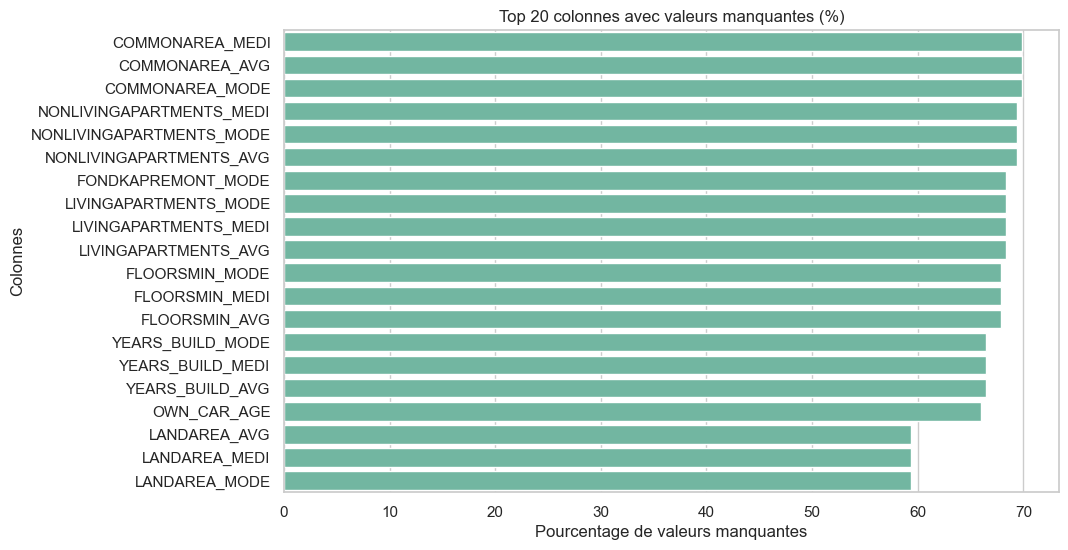

In [3]:
# =========================================================
# 4️⃣ Visualisation des valeurs manquantes
# =========================================================
plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent[:20], y=missing_percent.index[:20])
plt.title("Top 20 colonnes avec valeurs manquantes (%)")
plt.xlabel("Pourcentage de valeurs manquantes")
plt.ylabel("Colonnes")
plt.show()


ces colonnes sont donc à banaliser lors de l'analyse 


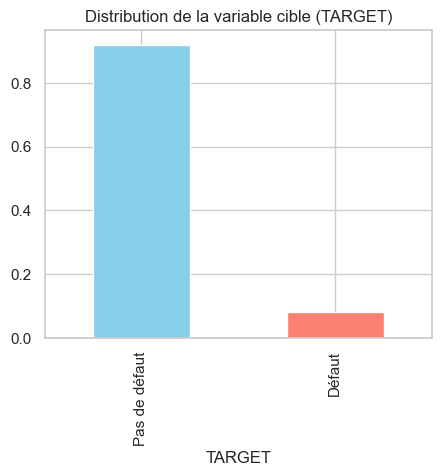

Taux de défaut : 8.07 %


In [5]:
# =========================================================
# 5️⃣ Analyse de la variable cible
# =========================================================
plt.figure(figsize=(5,4))
df['TARGET'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution de la variable cible (TARGET)")
plt.xticks([0, 1], ['Pas de défaut', 'Défaut'])
plt.show()

print("Taux de défaut :", round(df['TARGET'].mean()*100, 2), "%")


on peut alors conclure que 8,07 % des clients n'ont pas encore remboursé leur crédit 

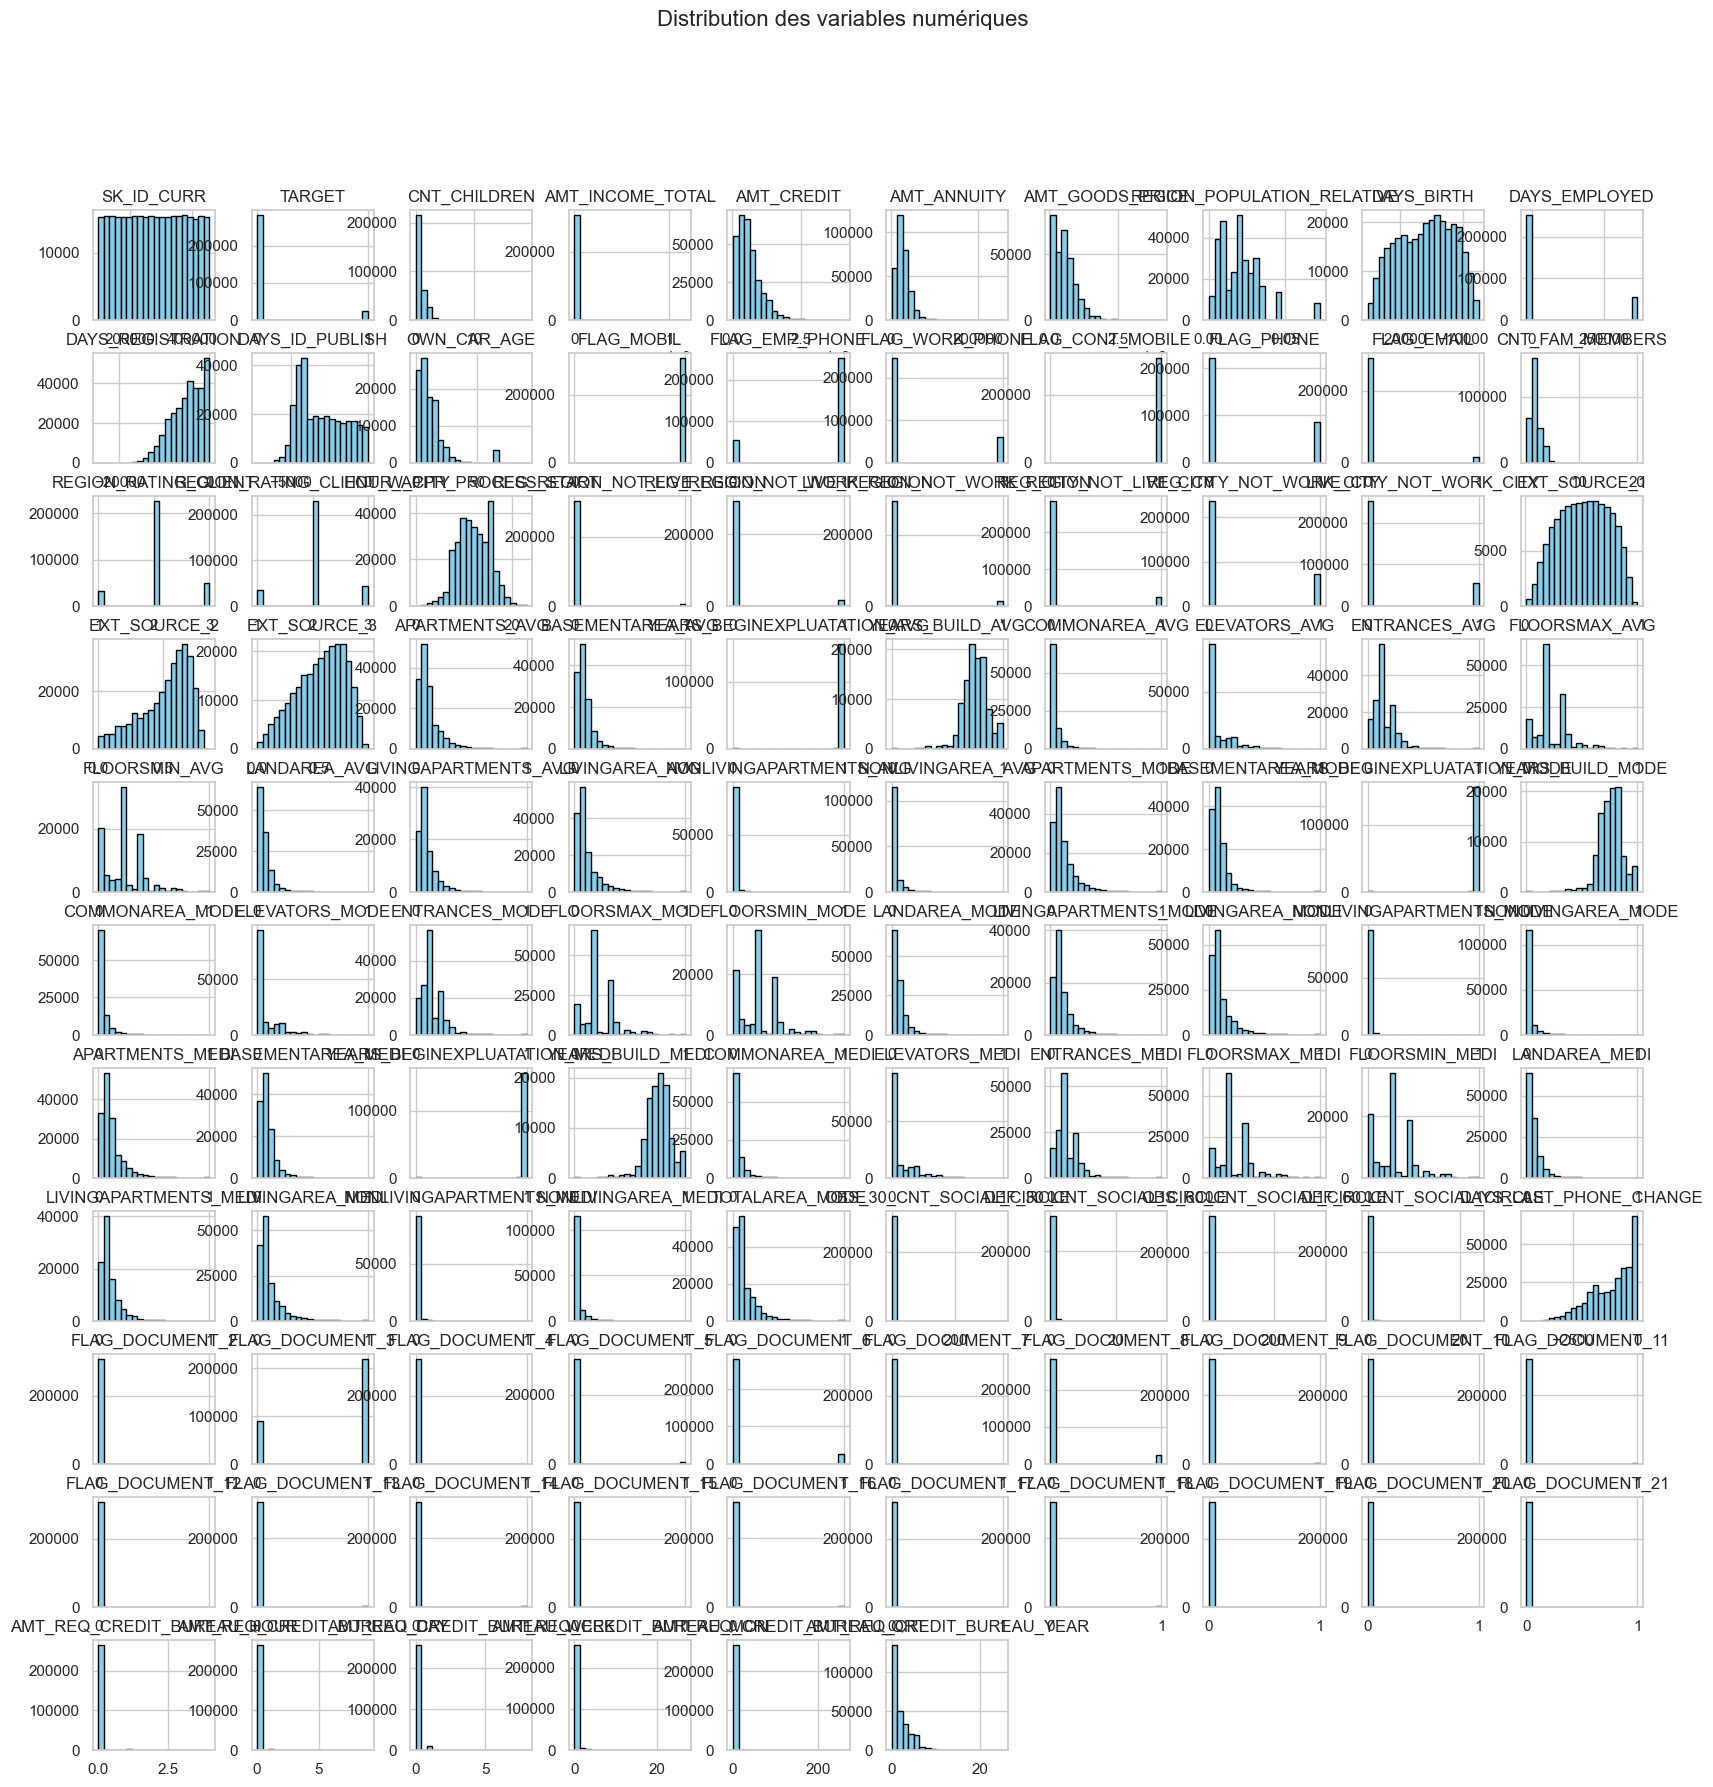

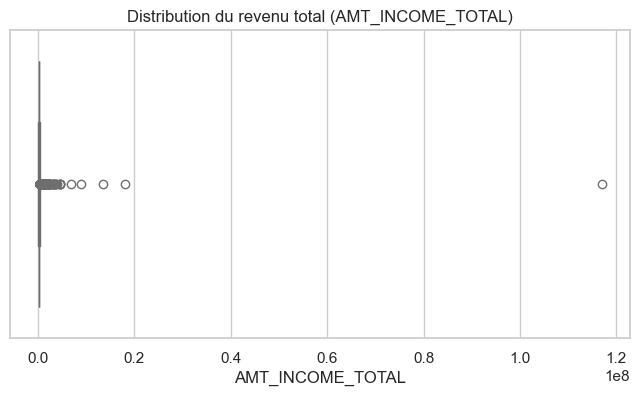

In [6]:
# =========================================================
# 6️⃣ Analyse univariée - Variables numériques
# =========================================================
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histogrammes
df[num_cols].hist(bins=20, figsize=(20,20), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()

# Exemple de boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['AMT_INCOME_TOTAL'], color='lightcoral')
plt.title("Distribution du revenu total (AMT_INCOME_TOTAL)")
plt.show()


Nombre de variables catégorielles : 16


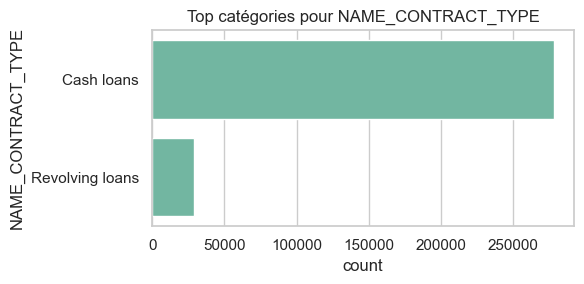

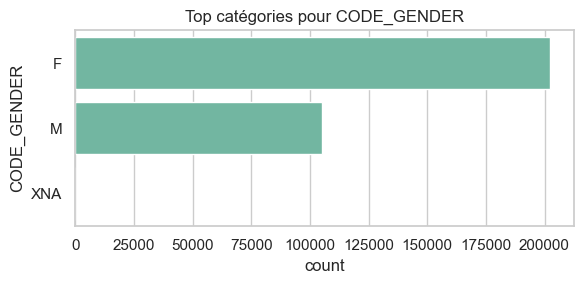

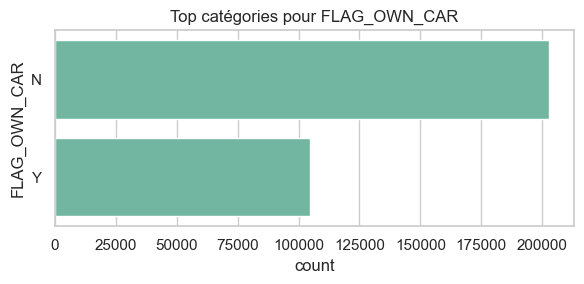

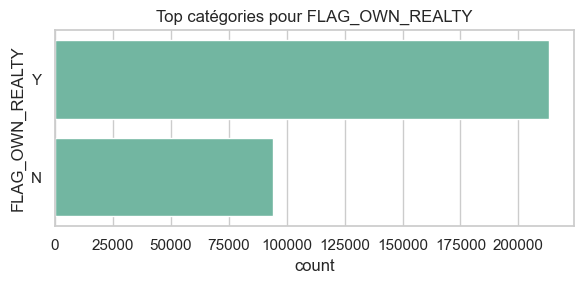

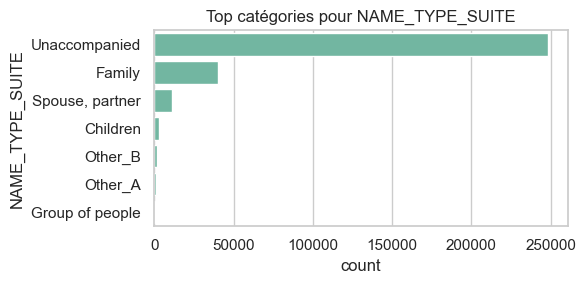

In [7]:
# =========================================================
# 7️⃣ Analyse des variables catégorielles
# =========================================================
cat_cols = df.select_dtypes(include=['object']).columns
print(f"Nombre de variables catégorielles : {len(cat_cols)}")

# Distribution pour quelques colonnes
for col in cat_cols[:5]:
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
    plt.title(f"Top catégories pour {col}")
    plt.tight_layout()
    plt.show()


les Femmes font plus de crédit cash que les hommes ; deplus il y a plus demande de crédit (cash que renouvelables)

🔝 Variables les plus corrélées avec TARGET :
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

🔻 Variables les moins corrélées :
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


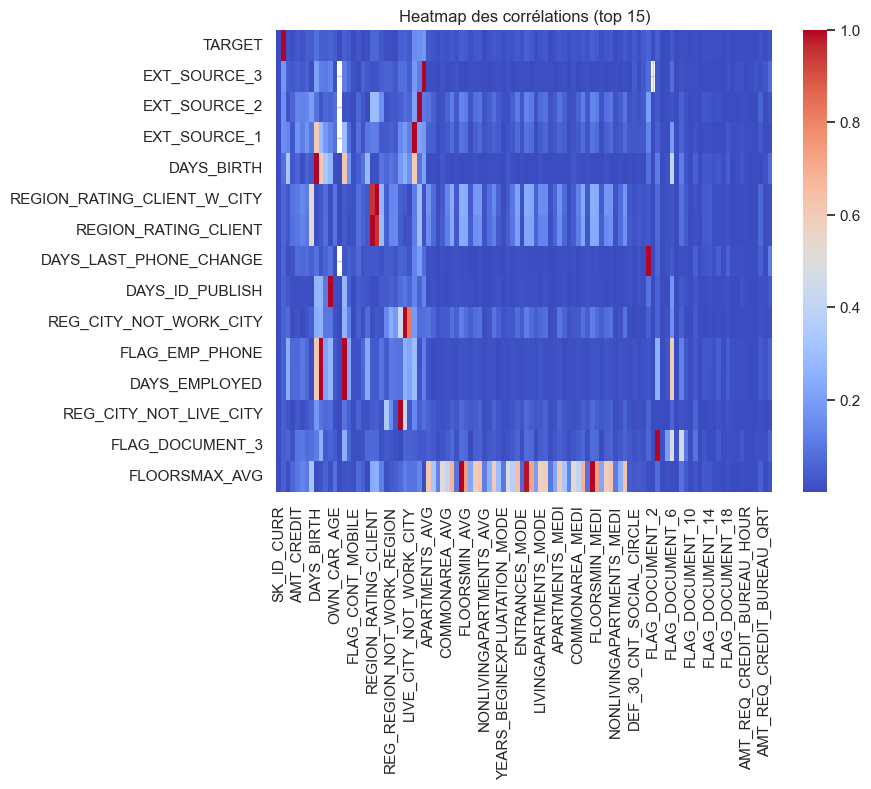

In [8]:
# =========================================================
# 8️⃣ Corrélation avec la variable cible
# =========================================================
corr = df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)
print("🔝 Variables les plus corrélées avec TARGET :")
print(corr.head(10))
print("\n🔻 Variables les moins corrélées :")
print(corr.tail(10))

# Heatmap des 15 principales corrélations
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(numeric_only=True).abs().nlargest(15, 'TARGET'), cmap='coolwarm', annot=False)
plt.title("Heatmap des corrélations (top 15)")
plt.show()


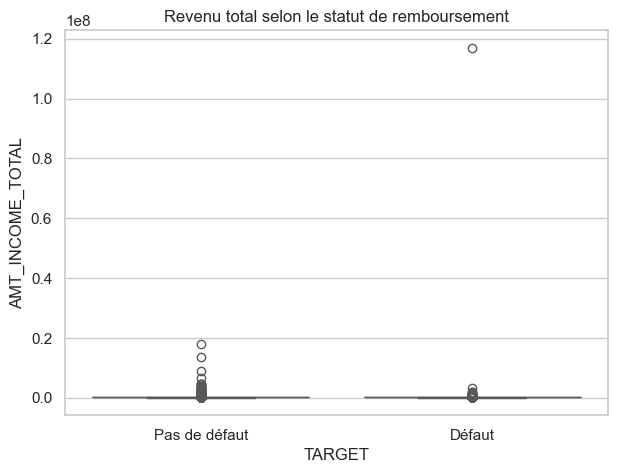

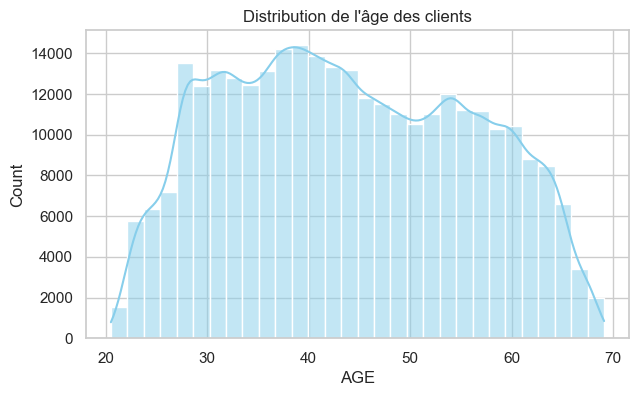

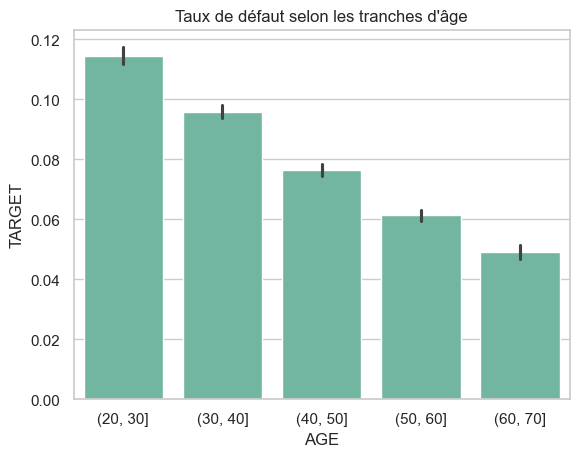

In [9]:
# =========================================================
# 9️⃣ Analyse bivariée - TARGET vs Variables clés
# =========================================================
plt.figure(figsize=(7,5))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.title("Revenu total selon le statut de remboursement")
plt.xticks([0,1], ['Pas de défaut', 'Défaut'])
plt.show()

# Distribution de l'âge
df['AGE'] = -df['DAYS_BIRTH'] / 365
plt.figure(figsize=(7,4))
sns.histplot(df['AGE'], bins=30, kde=True, color='skyblue')
plt.title("Distribution de l'âge des clients")
plt.show()

# Cible par tranches d'âge
age_bins = pd.cut(df['AGE'], bins=[20,30,40,50,60,70])
sns.barplot(x=age_bins, y='TARGET', data=df)
plt.title("Taux de défaut selon les tranches d'âge")
plt.show()


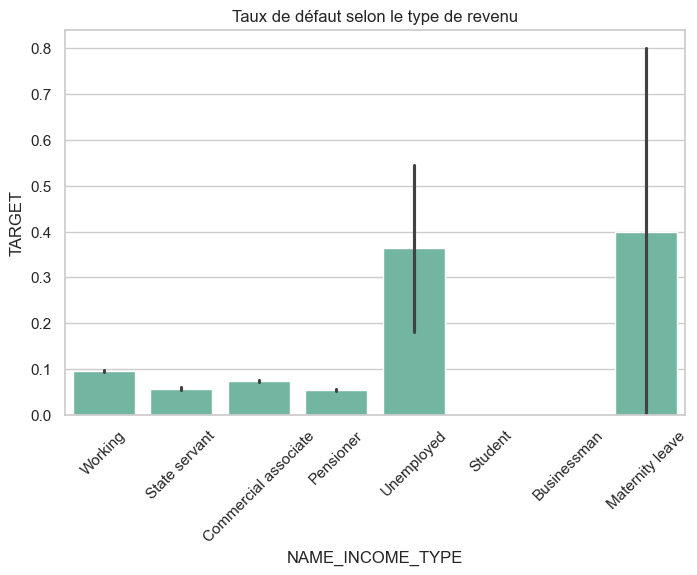

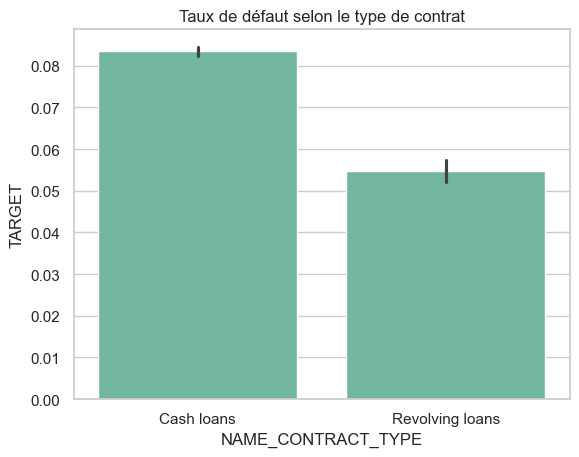

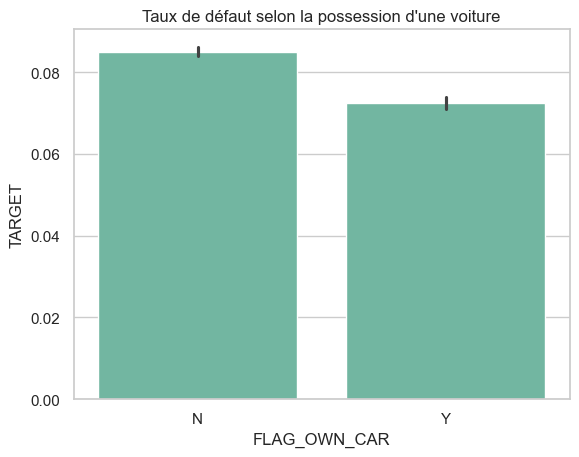

In [12]:
# =========================================================
# 🔟 Analyse croisée - Exemples de relations importantes
# =========================================================
# Type d'emploi et taux de défaut
plt.figure(figsize=(8,5))
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET', data=df)
plt.xticks(rotation=45)
plt.title("Taux de défaut selon le type de revenu")
plt.show()

# Type de contrat
sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET', data=df)
plt.title("Taux de défaut selon le type de contrat")
plt.show()

# Possession de voiture / maison
sns.barplot(x='FLAG_OWN_CAR', y='TARGET', data=df)
plt.title("Taux de défaut selon la possession d'une voiture")
plt.show()


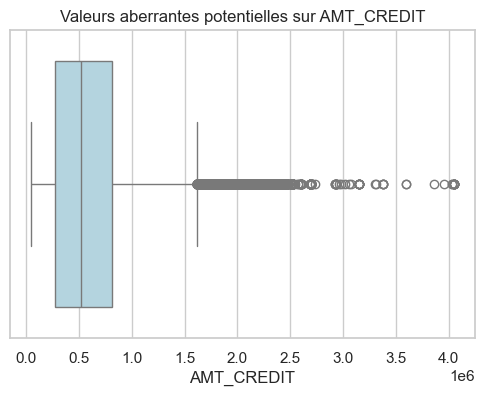

Données après suppression des outliers : (300949, 123)


In [11]:
# =========================================================
# 🔍 11️⃣ Détection des valeurs aberrantes
# =========================================================
plt.figure(figsize=(6,4))
sns.boxplot(x=df['AMT_CREDIT'], color='lightblue')
plt.title("Valeurs aberrantes potentielles sur AMT_CREDIT")
plt.show()

# Suppression optionnelle des outliers extrêmes
Q1 = df['AMT_CREDIT'].quantile(0.25)
Q3 = df['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['AMT_CREDIT'] >= Q1 - 1.5*IQR) & (df['AMT_CREDIT'] <= Q3 + 1.5*IQR)]
print("Données après suppression des outliers :", df_filtered.shape)


In [14]:
# =========================================================
# 📊 12️⃣ Synthèse des insights
# =========================================================
print("""
✅ Synthèse EDA :
- Dataset contient {} lignes et {} colonnes.
- Taux de défaut global : {:.2f}%.
- Variables les plus corrélées avec TARGET : EXT_SOURCE_3, EXT_SOURCE_2, AGE, DAYS_EMPLOYED.
- Les jeunes clients et ceux avec des revenus faibles présentent un risque plus élevé.
- Certains types d’emploi (Working, Maternity leave) et de contrats montrent plus de défauts.
""".format(df.shape[0], df.shape[1], df['TARGET'].mean()*100))



✅ Synthèse EDA :
- Dataset contient 307511 lignes et 123 colonnes.
- Taux de défaut global : 8.07%.
- Variables les plus corrélées avec TARGET : EXT_SOURCE_3, EXT_SOURCE_2, AGE, DAYS_EMPLOYED.
- Les jeunes clients et ceux avec des revenus faibles présentent un risque plus élevé.
- Certains types d’emploi (Working, Maternity leave) et de contrats montrent plus de défauts.




✅ Synthèse EDA :
- Dataset contient 307511 lignes et 123 colonnes.
- Taux de défaut global : 8.07%.
- Variables les plus corrélées avec TARGET : EXT_SOURCE_3, EXT_SOURCE_2, AGE, DAYS_EMPLOYED.
- Les jeunes clients et ceux avec des revenus faibles présentent un risque plus élevé.
- Certains types d’emploi (Working, Maternity leave) et de contrats montrent plus de défauts.
